To understand Logistic Regression and how to interpret the coefficients let's go through an exercise!!

Here, the goal is to predict whether or not a patient required surgery during their ICU stay based on their lab values and vital sign measurements.

The dataset is from the MIMIC database. Our target variable will be the require_surgery_flag column, which equals 1 if the patient required surgery during their ICU stay. The other variables will be used as predictors.

In [1]:
#munging imports
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

#modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"C:\Users\nesha\Desktop\MIMIC_Data_small.csv")
print(df.shape)
df.head()

(59726, 7)


,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,require_surgery_flag
0,14.369565,16,37.049383,95.0,79.525000,140.0,1
1,15.320000,13,36.653534,94.0,66.000000,140.0,0
2,15.404762,18,36.545714,95.0,54.500000,143.0,0
3,16.677419,13,37.033333,92.0,47.933333,141.0,0
4,22.241379,25,37.333334,89.0,48.428571,143.0,0


In [3]:
#creating X and y
X=df.iloc[:, :-1]
y=df['require_surgery_flag']

Split the data into train and test sets (80/20).

In [4]:
#splitting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=42)

Determine what is the "baseline" probability of requiring surgery in the ICU (looking only at the training set).

In [5]:
#to find the baseline rate we can look into the mean for training set of required_surgery_flag ( 0 and 1).
np.mean(y_train)

0.1077856843867727

We want to understand the relationship between the predictors and the target (looking only at the training set). Let's start with resprate_mean. What is the (empirical) probability of requiring surgery for patients with resprate_mean between 30 and 32? What about between 16 and 18? Between 6 and 12? What does this info tell you?

<AxesSubplot:>

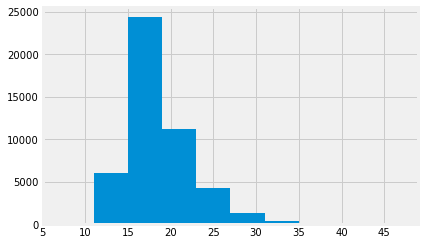

In [6]:
X_train.resprate_mean.hist()

In [7]:
#lets create masks for requested intervals
mask_1 = (X_train.resprate_mean >=30) & (X_train.resprate_mean <= 32)
mask_2 = (X_train.resprate_mean >=16) & (X_train.resprate_mean <= 18)
mask_3= (X_train.resprate_mean >= 6) & (X_train.resprate_mean <= 12)

print("Empirical probability of requiring surgery for patients with resprate_means:")
print("Between 30 and 32:", np.mean(y_train[mask_1]))
print("Between 16 and 18:", np.mean(y_train[mask_2]))
print("Between 6 and 12:", np.mean(y_train[mask_2]))

Empirical probability of requiring surgery for patients with resprate_means:
Between 30 and 32: 0.3746130030959752
Between 16 and 18: 0.08202212973302203
Between 6 and 12: 0.08202212973302203


Use the hist function to get bin counts and plot how the empirical probability changes with the value of resprate_mean. Then do it for the other predictor variables.

<ipython-input-8-cb0b71d541fa>:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))


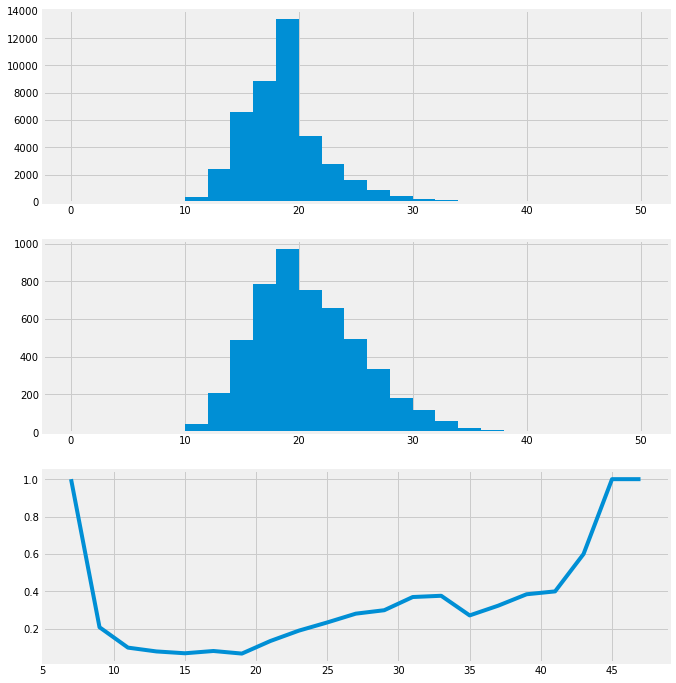

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'resprate_mean'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'resprate_mean'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

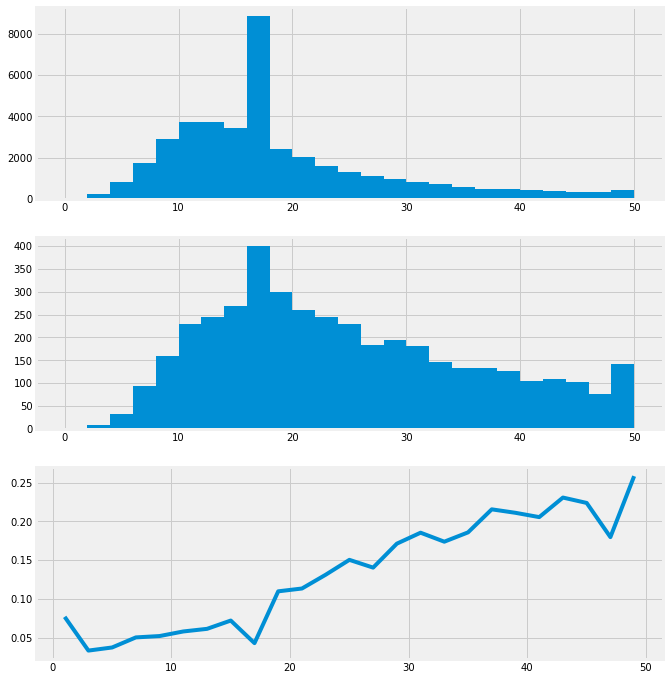

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'bun_min'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'bun_min'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

<ipython-input-10-9904f768c03b>:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))


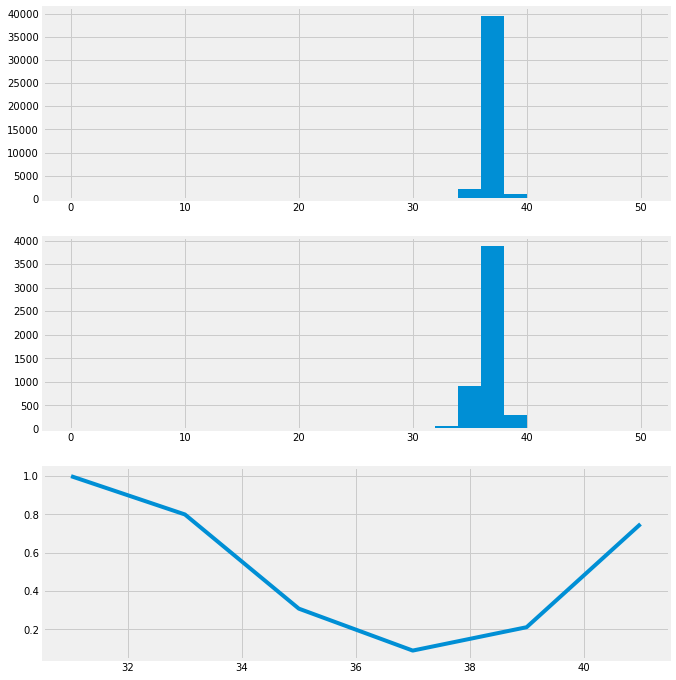

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'tempc_mean'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'tempc_mean'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

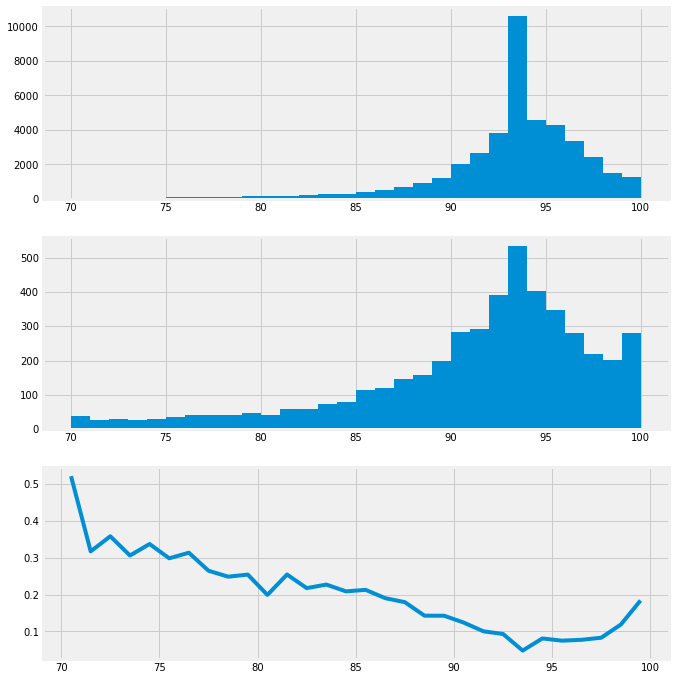

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 2 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'spo2_min'], bins=30, range=(70,100))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'spo2_min'], bins=30, range=(70,100))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

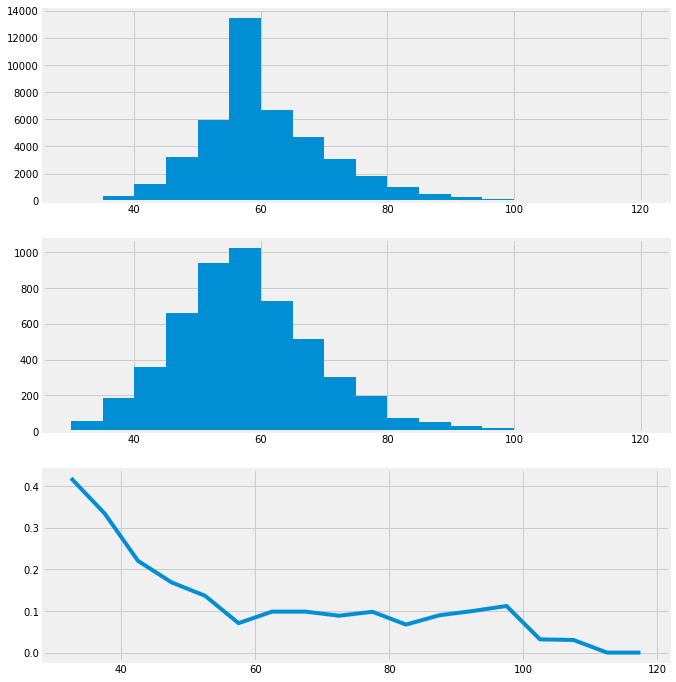

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 2 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'diasbp_mean'], bins=18, range=(30,120))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'diasbp_mean'], bins=18, range=(30,120))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

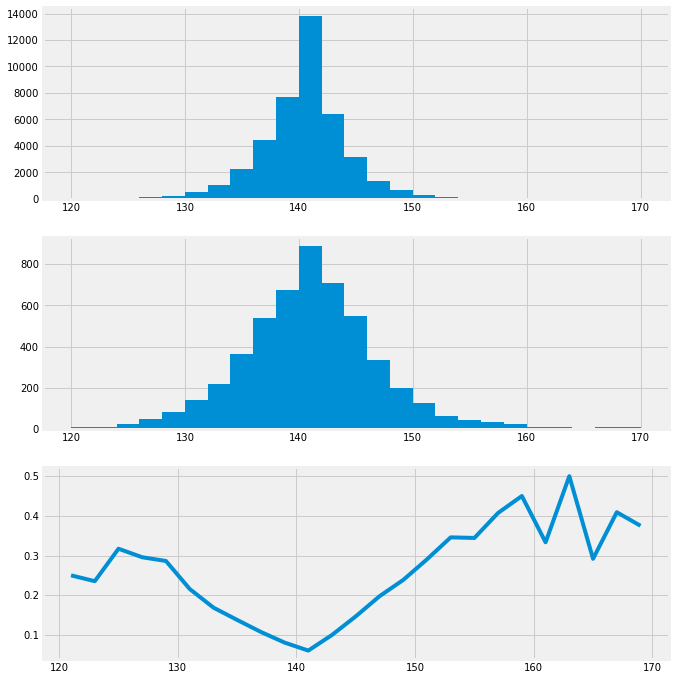

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 2 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'sodium_max'], bins=25, range=(120,170))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'sodium_max'], bins=25, range=(120,170))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

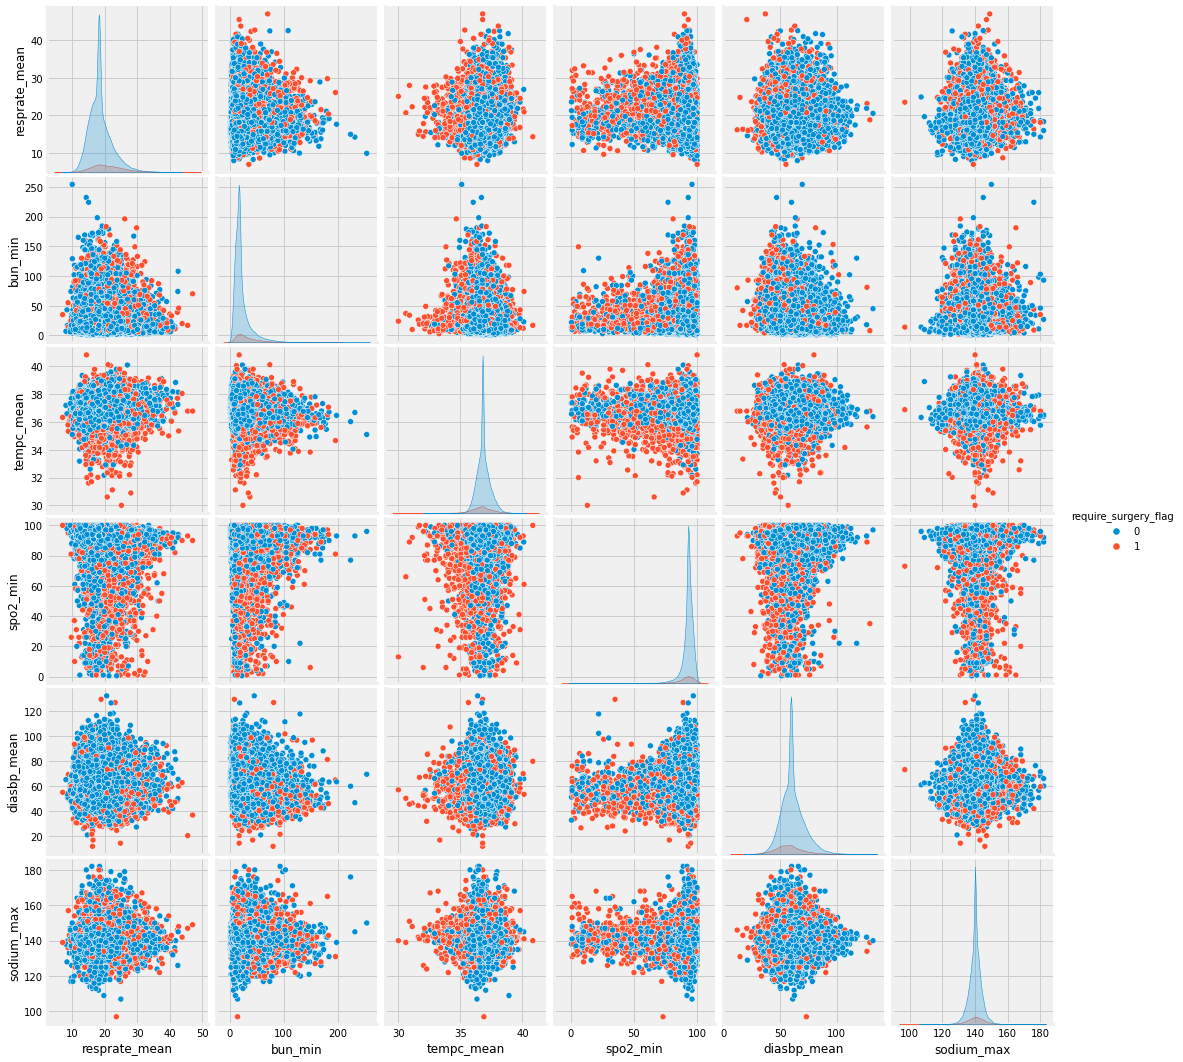

In [14]:
#let's look at the pairplot

sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='require_surgery_flag');

Before doing any logistic regression, guess which predictor variable you think will yield the best (single predictor) logistic regression model. Then run 6 logistic regression models - one for each variable. Was your prediction right? Use the log_loss function in sklearn.metrics to measure model performance (the closer to 0, the better).

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_prob_pred_test))

resprate_mean
0.3359603718942489
bun_min
0.3310496249649075
tempc_mean
0.34762290456701794
spo2_min
0.3352811995140327
diasbp_mean
0.3466805016477985
sodium_max
0.3530797404761448


Fit a logistic regression model using all of the variables. What is the log_loss?

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr_model_all = LogisticRegression(C=10000)
lr_model_all.fit(X_train, y_train)
y_prob_pred_test = lr_model_all.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.30324249495396594


How does this log loss compare to the baseline log loss, i.e. if we were to predict the basline probability of surgery?

In [17]:
#we calculated the baseline prior for y_train. Now let's perform it on y_test.
baseline_prob = np.mean(y_train)
baseline_y_pred = [baseline_prob for _ in range(len(y_test))]
avg_logloss = log_loss(y_test, baseline_y_pred)
avg_logloss

0.35201477744872833

How can we interpret the coefficients?

In [18]:
print(X_train.columns)
lr_model_all.coef_

Index(['resprate_mean', 'bun_min', 'tempc_mean', 'spo2_min', 'diasbp_mean',
       'sodium_max'],
      dtype='object')


array([[ 0.11894947,  0.02069954, -0.1454574 , -0.03783232, -0.02145848,
         0.03582937]])

Remember they are in log odds units:
* A one unit change in resprate_mean corresponds to a 0.1189 unit change in the log odds of requiring surgery
* A one unit change in tempc_mean corresponds to a -0.1454 unit change in the log odds of requiring surgery

In [19]:
#But what does log odds mean? Let's exponentiate to get rid of log:
np.exp(lr_model_all.coef_)

array([[1.12631301, 1.02091526, 0.86462672, 0.96287438, 0.97877011,
        1.03647897]])

* A one unit change in resprate_mean corresponds to a 12.6% increase in the odds of requiring surgery
* A one unit change in tempc_mean corresponds to a 13.5% decrease in the odds of requiring surgery

But what do we mean by odds? It is the probability of success divided by probability of failure. Odds increase as probabilities increase.
![](odds_r1.gif)

Hope you enjoyed this topic!